#01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#02. Import Data

In [3]:
#define path to main Instacart project folder
InstacartProjectFolder=r'C:\Users\user\Instacart Basket Analysis 02042023'

In [4]:
# import customers data set
ords_prods_cust=pd.read_pickle(os.path.join(InstacartProjectFolder,'02 Data','Prepared Data','ords_prods_cust_merge.pkl'))

#04 Create histogram from hour_of_day

In [5]:
ords_prods_cust.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_days_last_order,frequency_flag,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,550135,1,prior,7,1,9,20.0,196,1,1,...,20.5,non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,prior,1,2,8,NaN,12427,3,0,...,20.5,non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9721098 entries, 0 to 9721097
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int64   
 4   order_dow               int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  Unnamed: 0              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_day2            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalty_

<Axes: ylabel='Frequency'>

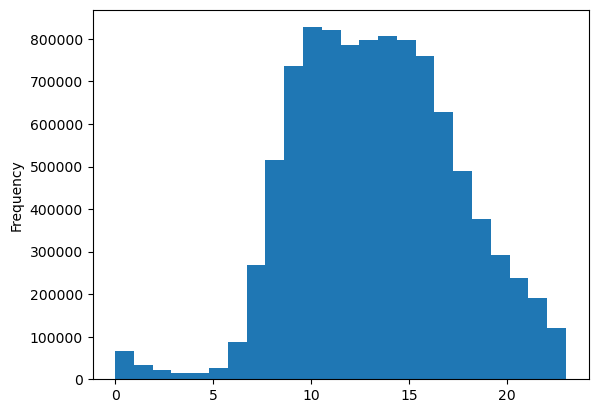

In [7]:
ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

#This Histogram shows that most customers are ordering between 9am and 4pm, and that very few customers order between 1am and 6am.  There is also a mid-sized audience in the evening hours between 5pm and 10pm, although it drops-off the later it gets in the day.

#04 Create Bar chart from Loyalty Flag

<Axes: >

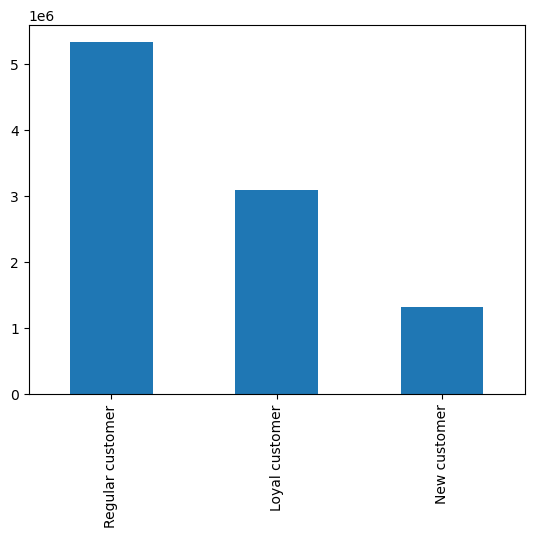

In [9]:
ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [10]:
ords_prods_cust['loyalty_flag'].value_counts(dropna=False)

Regular customer    5324079
Loyal customer      3084613
New customer        1312406
Name: loyalty_flag, dtype: int64

#05 Create Line chart of price vs. time of day

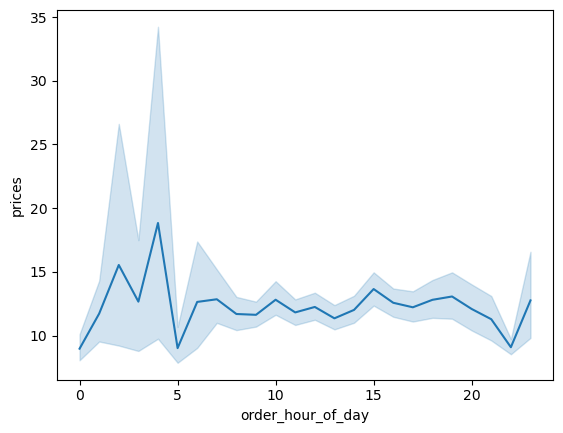

In [11]:
#create line chart with super small dataset
line = sns.lineplot(data = ords_prods_cust, x = 'order_hour_of_day',y = 'prices')

#This line chart shows the most expensive items are puchased at night.  (This is unexpected behavior).

#06 Create line chart Age vs. Number Dependants

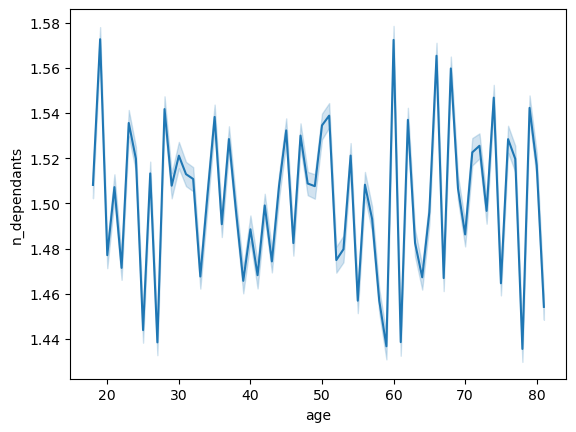

In [12]:
line2 = sns.lineplot(data = ords_prods_cust, x = 'age',y = 'n_dependants')

In [13]:
ords_prods_cust['n_dependants'].describe()

count    9.721098e+06
mean     1.501746e+00
std      1.118784e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

#This line chart shows that there is no difference in the number of dependents based on the age of the customer.  All customers, regardless of age, tend to have the same number of dependants hovering around the average of 1.5.

#07 Create Scatterplot of Age vs. Income

<Axes: xlabel='age', ylabel='income'>

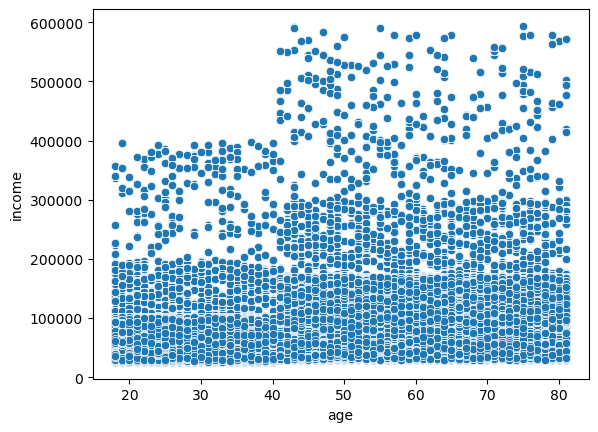

In [14]:
sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust)

#This scatterplot shows that after the age of 40, there tends to be a shift in income and that more people earn more money after the age of 40.

#08 Export charts as images

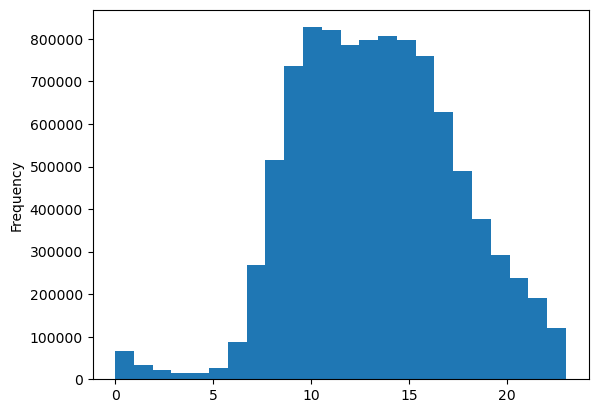

In [15]:
#convert histogram to object
hist=ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

In [16]:
#export histogram object
hist.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'hist_orderhour.png'))


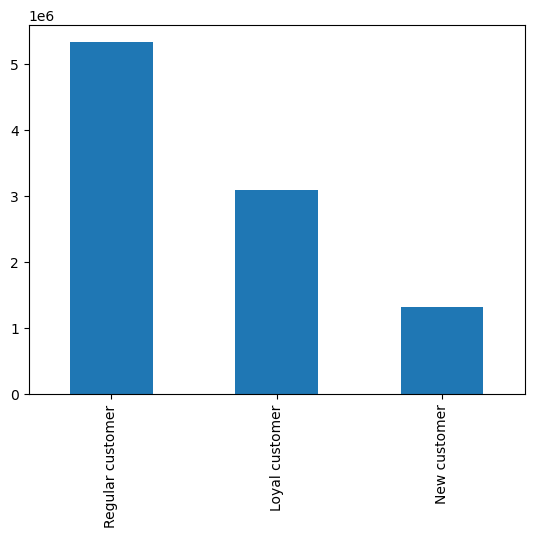

In [17]:
#convert bar chart to object
bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [19]:
#export bar object
bar.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'bar_loyalty.png'))


In [20]:
#export line object
line.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_price_hour.png'))


In [21]:
#export line object
line2.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'line_age_dependants.png'))


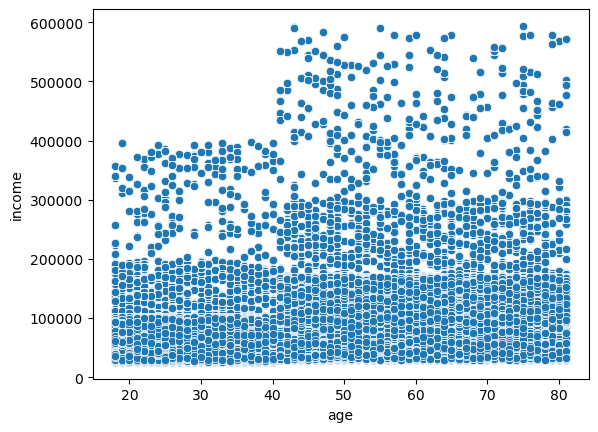

In [22]:
#convert scatterplot to object
scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_cust)

In [23]:
#export scatter object
scatter.figure.savefig(os.path.join(InstacartProjectFolder, '04 Analysis','Visualizations', 'scatter_age_income.png'))
